Mikail Crito Husada

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('imdb_indonesian_movies_2.csv')

In [2]:
df.head()

,judul_film,ringkasan_sinopsis,genre
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [3]:
df.shape

(1005, 3)

In [4]:
df.isna().sum()

judul_film            0
ringkasan_sinopsis    0
genre                 0
dtype: int64

In [6]:
df.genre.value_counts()
sns.set_style("darkgrid")

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   judul_film          1005 non-null   object
 1   ringkasan_sinopsis  1005 non-null   object
 2   genre               1005 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB
None


In [8]:
df['text'] = df['ringkasan_sinopsis'] + " " + df['genre']
df

,judul_film,ringkasan_sinopsis,genre,text
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama,Raden Mas Said putra sulung Tumenggung Wilarik...
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama,Soe Hok Gie adalah seorang aktivis yang hidup ...
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama,Guru Bangsa Tjokroaminoto menceritakan tentang...
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama,POL menceritakan kisah hidup yang luar biasa d...
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...
...,...,...,...,...
1000,Winter in Tokyo,Winter in Tokyo berpusat pada kehidupan Ishida...,Romantis,Winter in Tokyo berpusat pada kehidupan Ishida...
1001,Petualang Cinta,Markonah melarikan diri ke Jakarta karena akan...,Romantis,Markonah melarikan diri ke Jakarta karena akan...
1002,Last Night (III),"Tempat aking lebih dari 36 jam, Last Night ada...",Romantis,"Tempat aking lebih dari 36 jam, Last Night ada..."
1003,Path of Light,Proyek baru ini adalah tentang seorang lelaki ...,Romantis,Proyek baru ini adalah tentang seorang lelaki ...


Cleaning Data

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.preprocessing import text, sequence
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stwd = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stwd.update(punctuation)

In [11]:
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

In [12]:
def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)
def remove_url(text):
  return re.sub(r'http\S+', '', text)

In [13]:
def remove_stopwords(text):
  final_text=[]
  for i in text.split():
    if i.strip().lower() not in stwd:
      final_text.append(i.strip())
  return " ".join(final_text)

In [14]:
def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  text = remove_url(text)
  text = remove_stopwords(text)
  return text

In [15]:
df['text'] = df['text'].apply(denoise_text)

<ipython-input-11-cddfa3a7b814>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Jumlah Kata

In [16]:
from typing import Counter
def get_corpus(text):
  words = []
  for i in text:
    for j in i.split():
      words.append(j.strip())
  return words
corpus = get_corpus(df.text)
corpus[:10]

# kata yang sering ditemukan
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'yang': 4041,
 'dan': 3208,
 'di': 1701,
 'dengan': 1530,
 'untuk': 1393,
 'mereka': 979,
 'dari': 880,
 'tidak': 779,
 'ke': 700,
 'itu': 694}

<Axes: >

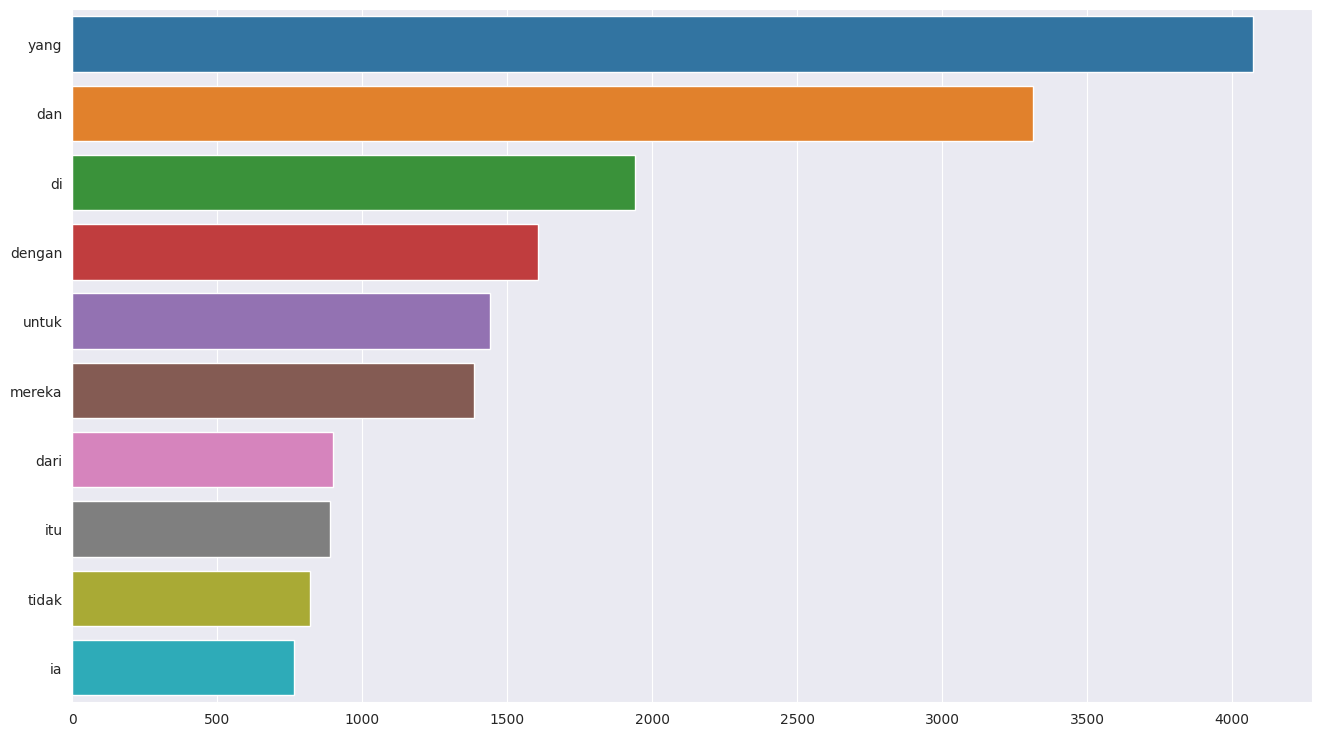

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
  cv = CountVectorizer(ngram_range=(g, g)).fit(corpus)
  bag_words = cv.transform(corpus)
  sum_words = bag_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

plt.figure(figsize = (16,9))
most_common = get_top_text_ngrams(df.text,10,1)
most_common = dict(most_common)
sns.barplot(x=list(most_common.values()), y=list(most_common.keys()))

Encoding & Splitting Data

In [19]:
#One-Hot-Encoding
genre= pd.get_dummies(df.genre)
new_cat = pd.concat([df, genre], axis=1)
new_cat = new_cat.drop(columns='genre')
new_cat.head(10)

,judul_film,ringkasan_sinopsis,text,Drama,Horor,Komedi,Laga,Romantis
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
5,Sundul Gan: The Story of Kaskus,Di Seattle ketika menyadari Andrew Darwis adal...,Di Seattle ketika menyadari Andrew Darwis adal...,1,0,0,0,0
6,Maju Terus!,Orang buangan Maluku di Belanda telah dicap se...,Orang buangan Maluku di Belanda telah dicap se...,1,0,0,0,0
7,Pendidik Berjiwa Merdeka,Ketika kita membahas tentang pendidikan di Ind...,Ketika kita membahas tentang pendidikan di Ind...,1,0,0,0,0
8,Jokowi,ni adalah cerita seorang anak tukang kayu bern...,ni adalah cerita seorang anak tukang kayu bern...,1,0,0,0,0
9,Jaka Sembung & Bergola Ijo,Film ini menceritakan mengenai perjalanan lanj...,Film ini menceritakan mengenai perjalanan lanj...,1,0,0,0,0


Change Dataframe to Numpy Array

In [21]:
sinopsis = new_cat['text'].values
label = new_cat[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

#cek news
sinopsis

#cek label
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

Split Dataset

In [22]:
x_train, x_test, y_train, y_test = train_test_split(sinopsis, label, test_size = 0.2, shuffle=True)

Tokenizer dan Permodelan Sequential dengan Embedding dan LSTM

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

vocab_size = 10000
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)
pad_train = pad_sequences(sequence_train, maxlen=max_len, truncating=trunc_type)
pad_test = pad_sequences(sequence_test, maxlen=max_len, truncating=trunc_type)

In [24]:
print(pad_test.shape)

(201, 200)


In [25]:
pad_train

array([[   0,    0,    0, ..., 3583, 2924,   63],
       [   0,    0,    0, ...,   24,  405,   58],
       [   0,    0,    0, ..., 1788,  891,   63],
       ...,
       [   0,    0,    0, ...,  101, 2587,   58],
       [   0,    0,    0, ...,   18, 5602,   63],
       [   0,    0,    0, ...,  181, 3048,   63]], dtype=int32)

In [26]:
pad_test

array([[   1,    1,  432, ...,   27,  160,  265],
       [   0,    0,    0, ...,   32,  201,   73],
       [   0,    0,    0, ...,   33,    9,   63],
       ...,
       [   0,    0,    0, ...,   16, 4466,   73],
       [   0,    0,    0, ...,    4,  485,   58],
       [   0,    0,    0, ...,    2,    1,   63]], dtype=int32)

MODEL

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length = max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 755,973
Trainable params: 755,973
Non-trainable params: 0
_________________________________________________________________


Callback

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=()):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training=True
      print("\n akurasi dari training set dan validation set telah terpenuhi > 90%")
callbacks = myCallback()

In [29]:
num_epochs = 50
history = model.fit(pad_train, y_train, epochs=num_epochs,
                    validation_data=(pad_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
26/26 - 11s - loss: 1.5643 - accuracy: 0.6194 - val_loss: 1.4606 - val_accuracy: 0.9055 - 11s/epoch - 438ms/step
Epoch 2/50
26/26 - 9s - loss: 1.2540 - accuracy: 0.8047 - val_loss: 1.0301 - val_accuracy: 0.8905 - 9s/epoch - 359ms/step
Epoch 3/50
26/26 - 9s - loss: 0.5981 - accuracy: 0.9229 - val_loss: 0.3630 - val_accuracy: 0.8905 - 9s/epoch - 331ms/step
Epoch 4/50

 akurasi dari training set dan validation set telah terpenuhi > 90%
26/26 - 8s - loss: 0.1226 - accuracy: 0.9789 - val_loss: 0.4244 - val_accuracy: 0.9005 - 8s/epoch - 315ms/step


Grafik

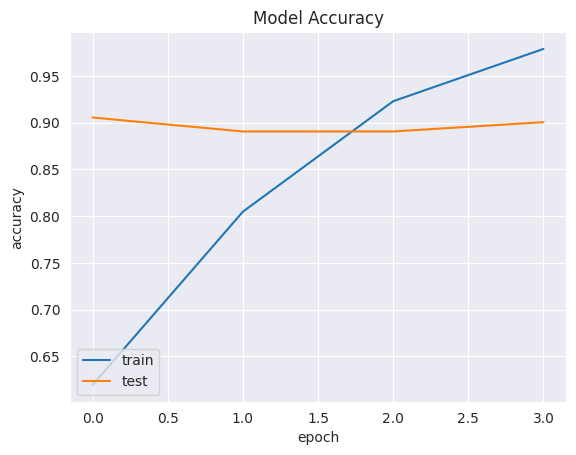

In [30]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

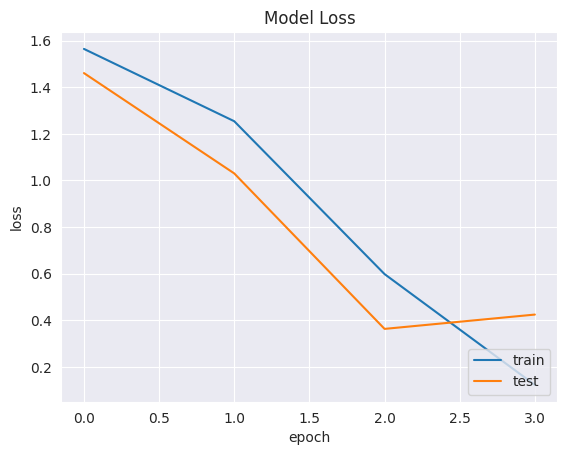

In [31]:
#plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()